In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df1=pd.read_csv("C:\\Users\\gverm\\Downloads\\insurance.csv")

In [4]:
df1.head

<bound method NDFrame.head of     age  bought_insurance
0    22                 0
1    25                 0
2    47                 1
3    52                 0
4    46                 1
5    56                 1
6    55                 0
7    60                 1
8    62                 1
9    61                 1
10   18                 0
11   28                 0
12   27                 0
13   29                 0
14   49                 1
15   55                 1
16   25                 1
17   58                 1
18   19                 0
19   18                 0
20   21                 0
21   26                 0
22   40                 1
23   45                 1
24   50                 1
25   54                 1
26   23                 0>

Text(0, 0.5, 'A person will buy an insurance or not')

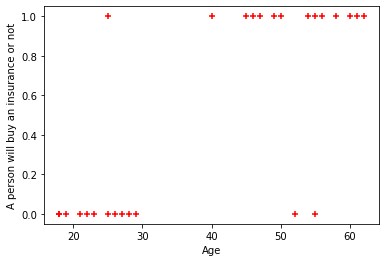

In [12]:
plt.scatter(df1['age'],df1['bought_insurance'],marker='+',color='red')
plt.xlabel("Age")
plt.ylabel("A person will buy an insurance or not")

In [13]:
# Split data into features and target
X=df1.drop('bought_insurance', axis=1)
Y=df1.bought_insurance

In [8]:
# Sigmoid function converts numbers in the range 0-1 and the chart will look like S
# we feed the line of linear regression into sigmoid function

In [14]:
# split data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.7, random_state=0)

In [15]:
# model creation

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_test


2     1
24    1
14    1
17    1
5     1
11    0
23    1
13    0
19    0
Name: bought_insurance, dtype: int64

In [17]:
model.predict(X_test)


array([1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [18]:
model.score(X_test,y_test)

1.0

In [19]:
model.score(X_train,y_train)

0.7777777777777778

In [20]:
# using confusion matrix

y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

# we are supplying actual value and predicted value
cm = confusion_matrix(y_test, y_predicted)
cm

array([[3, 0],
       [0, 6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

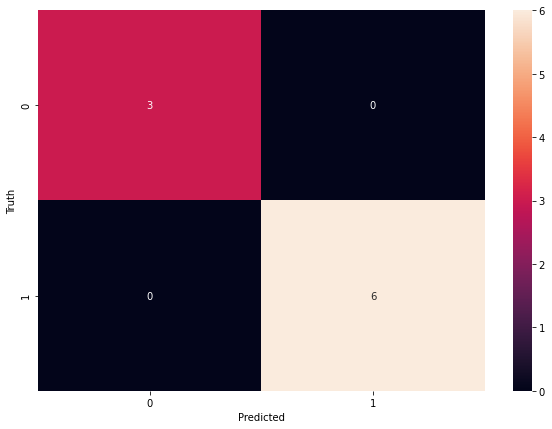

In [21]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
from sklearn.metrics import classification_report

predictions=model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



# Example 2

In [23]:
df2=pd.read_csv("C:\\Users\\gverm\\Downloads\\HR_data.csv")

In [24]:
df2.head

<bound method NDFrame.head of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2        

In [25]:
df2.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2      

In [26]:
df2.shape

(14999, 10)

In [27]:
#1 means left and 0 means retained
# count number of left persons 

df2.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [28]:
df2.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [29]:
# above correlation given us following insights:
# satisfaction level and left are negatively correlated
# last evealuation has no impact on left cases
# no. of projects has no impact on left cases
# avg monthly hrs and left cases are related
# work accidents has no impact on left cases
# promotion in last five years and left are negatively correlated
# salary and left are negatively correlated

In [30]:
subdf = df2[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [31]:
# lets convert salary from categorical to numerical variable

salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
5,0.41,153,0,low,0,1,0
6,0.10,247,0,low,0,1,0
7,0.92,259,0,low,0,1,0
8,0.89,224,0,low,0,1,0
9,0.42,142,0,low,0,1,0


In [32]:
df_with_dummies.drop(['salary','salary_medium'],axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [35]:
# split data into feature and target
X=df_with_dummies
X.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [34]:
#choosing target variable
y=df2.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
#splitting data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)


In [37]:
len(X_train)


10499

In [38]:
len(X_test)

4500

In [39]:
from sklearn.linear_model import LogisticRegression
#making a model for logistic reg.
model = LogisticRegression()

In [40]:
#training model
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
#predicting the output
model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
y_test[:10]


1670     1
13378    0
10233    0
4719     0
7003     0
2831     0
13013    0
11978    0
8610     0
519      1
Name: left, dtype: int64

In [43]:
model.score(X_test,y_test)

0.7788888888888889

In [44]:
# using confusion matrix

y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

# we are supplying actual value and predicted value
cm = confusion_matrix(y_test, y_predicted)
cm

array([[3236,  226],
       [ 769,  269]], dtype=int64)

Text(69.0, 0.5, 'Truth')

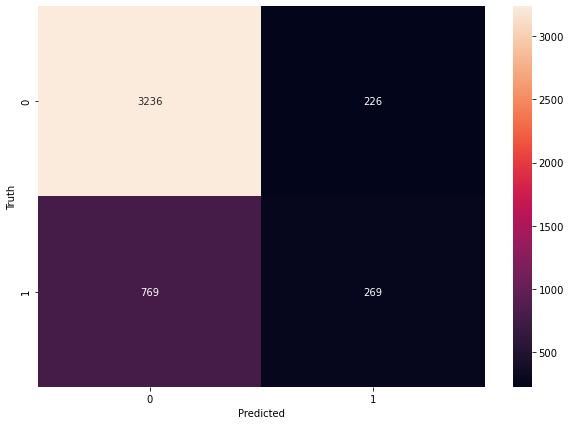

In [45]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
from sklearn.metrics import classification_report

predictions=model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3462
           1       0.54      0.26      0.35      1038

    accuracy                           0.78      4500
   macro avg       0.68      0.60      0.61      4500
weighted avg       0.75      0.78      0.75      4500



# Example3

In [50]:
df3=pd.read_csv("C:\\Users\\gverm\\Downloads\\quality.csv")

In [64]:
df3.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [52]:
# data description

# MemberID numbers the patients from 1 to 131, and is just an identifying number.
# InpatientDays is the number of inpatient visits, or number of days the person spent in the hospital.
# ERVisits is the number of times the patient visited the emergency room.
# OfficeVisits is the number of times the patient visited any doctor’s office.
# Narcotics is the number of prescriptions the patient had for narcotics.
# DaysSinceLastERVisit is the number of days between the patient’s last emergency room visit 
# Pain is the number of visits for which the patient complained about pain.
# TotalVisits is the total number of times the patient visited any healthcare provider.
# ProviderCount is the number of providers that served the patient.
# MedicalClaims is the number of days on which the patient had a medical claim.
# ClaimLines is the total number of medical claims.
# StartedOnCombination is whether or not the patient was started on a combination of drugs to treat their diabetes (TRUE or FALSE).
#

In [54]:
# AcuteDrugGapSmall is the fraction of acute drugs that were refilled quickly after the prescription ran out.
# PoorCare is the outcome or dependent variable, 
#and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care.

In [63]:
df3.corr()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
MemberID,1.000000,-0.063620,-0.011032,-0.006273,0.203962,0.100174,0.023700,-0.032954,0.012511,-0.065212,-0.090459,-0.144841,0.196651,0.060916
InpatientDays,-0.063620,1.000000,0.440087,0.175901,-0.093769,-0.290121,0.304058,0.622036,0.244023,0.286378,0.386951,0.105626,-0.001144,0.080726
ERVisits,-0.011032,0.440087,1.000000,0.308526,-0.003732,-0.735246,0.546779,0.586439,0.457429,0.355319,0.542001,0.118766,-0.072750,0.135401
OfficeVisits,-0.006273,0.175901,0.308526,1.000000,0.275759,-0.128388,0.352968,0.865387,0.365469,0.498513,0.424953,0.164056,0.200735,0.329512
Narcotics,0.203962,-0.093769,-0.003732,0.275759,1.000000,0.065055,0.106860,0.163992,0.293478,0.220541,0.185799,0.043641,0.710889,0.447236
DaysSinceLastERVisit,0.100174,-0.290121,-0.735246,-0.128388,0.065055,1.000000,-0.358781,-0.344640,-0.297701,-0.198114,-0.412797,-0.061953,0.131085,-0.107983
Pain,0.023700,0.304058,0.546779,0.352968,0.106860,-0.358781,1.000000,0.482959,0.405095,0.296697,0.464713,0.078373,-0.031490,0.092168
TotalVisits,-0.032954,0.622036,0.586439,0.865387,0.163992,-0.344640,0.482959,1.000000,0.451545,0.549308,0.569619,0.185814,0.134861,0.300540
ProviderCount,0.012511,0.244023,0.457429,0.365469,0.293478,-0.297701,0.405095,0.451545,1.000000,0.517002,0.605357,0.155765,0.141284,0.220166
MedicalClaims,-0.065212,0.286378,0.355319,0.498513,0.220541,-0.198114,0.296697,0.549308,0.517002,1.000000,0.813935,0.067931,0.085637,0.167399


In [56]:
#lets start buliding the model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [57]:
#similar to what we do n Linear regression we split the data into 2 parts..
# And define the DV and IVs.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3[["DaysSinceLastERVisit","Narcotics","Pain","TotalVisits"]],df3['PoorCare'],test_size=0.3,random_state=1)

In [61]:
X_train.head()

,DaysSinceLastERVisit,Narcotics,Pain,TotalVisits
48,718.0,0,0,3
124,731.0,0,0,23
53,72.0,0,33,11
51,716.0,0,10,30
112,349.0,0,47,26


In [62]:
y_train.head()

48     0
124    1
53     0
51     0
112    0
Name: PoorCare, dtype: int64

In [65]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [66]:
log_reg.score(X_test,y_test)


0.75

In [67]:
log_reg.score(X_train,y_train)

0.8461538461538461

In [68]:
pred_test=log_reg.predict(X_test)

In [69]:
cm = confusion_matrix(y_test, pred_test)
cm

array([[23,  4],
       [ 6,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

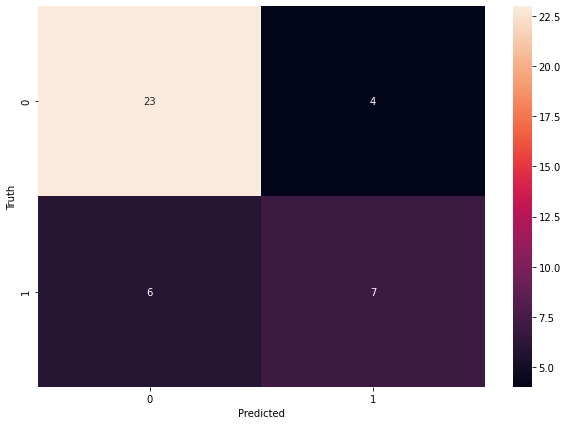

In [70]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.64      0.54      0.58        13

    accuracy                           0.75        40
   macro avg       0.71      0.70      0.70        40
weighted avg       0.74      0.75      0.74        40

